In [2]:
#Import Libraries
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import statsmodels.api as sm
from   scipy.stats               import ttest_1samp, ttest_ind
import statistics

### Problem-1. A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail)

In [3]:
WS_Cust = pd.read_csv('Wholesale Customer.csv')

#### 1.1.Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [5]:
WS_Cust.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [88]:
WS_Cust.shape

(440, 9)

In [89]:
WS_Cust.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

<Figure size 1440x720 with 0 Axes>

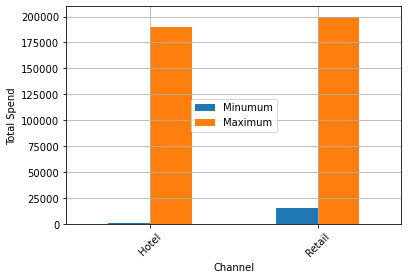

In [90]:
WS_Cust['Total_Spend']= WS_Cust['Fresh'] + WS_Cust['Milk'] + WS_Cust['Grocery'] + WS_Cust['Frozen'] + WS_Cust['Detergents_Paper'] + WS_Cust['Delicatessen']
df_Channel = WS_Cust.groupby('Channel')['Total_Spend']
channel_summary=pd.merge(df_Channel.min(),df_Channel.max(), on='Channel')
channel_summary.columns= ['Minumum','Maximum']
plt.figure(figsize = (20,10))
channel_summary.plot.bar();
plt.xticks(rotation = 45)
plt.legend(loc='center')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

<Figure size 1440x432 with 0 Axes>

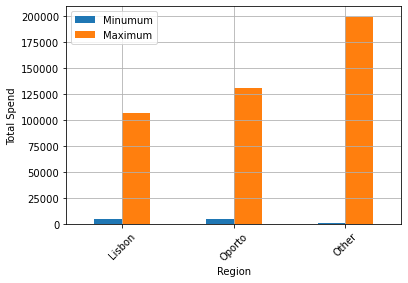

In [91]:
df_Region = WS_Cust.groupby('Region')['Total_Spend']
Region_summary=pd.merge(df_Region.min(),df_Region.max(), on='Region')
Region_summary.columns= ['Minumum','Maximum']
plt.figure(figsize = (20,6))
Region_summary.plot.bar();
plt.xticks(rotation = 45)
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

## ANSWER 1.1

#### 1) Column 'Total_Spend'  is added to main DataFrame which contains total spend on all 6 items.
#### 2) DataFrames 'df_Channel' and 'df_Region'are created to contain consolidated 'Total Spend' both for Channels and Regions
#### 3) Maximum and Minimum of 'Total Spend' both for Channels and Regions is taken from these dataframes and then plotted as        Barplots
#### 4) Minimum of Total spend  of 904 is for  Channel 'Hotel' and Region 'Other '
#### 5) Maximum of Total spend  of 199891 is for  Channel 'Retail' and Region 'Other '


#### 1.2.There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [92]:
df_Region_Fresh = WS_Cust.groupby('Region')['Fresh']
df_Region_Milk = WS_Cust.groupby('Region')['Milk']
df_Region_Grocery = WS_Cust.groupby('Region')['Grocery']
df_Region_Frozen = WS_Cust.groupby('Region')['Frozen']
df_Region_Detergents_Paper = WS_Cust.groupby('Region')['Detergents_Paper']
df_Region_Delicatessen = WS_Cust.groupby('Region')['Delicatessen']
df_Channel_Fresh = WS_Cust.groupby('Channel')['Fresh']
df_Channel_Milk = WS_Cust.groupby('Channel')['Milk']
df_Channel_Grocery = WS_Cust.groupby('Channel')['Grocery']
df_Channel_Frozen = WS_Cust.groupby('Channel')['Frozen']
df_Channel_Detergents_Paper = WS_Cust.groupby('Channel')['Detergents_Paper']
df_Channel_Delicatessen = WS_Cust.groupby('Channel')['Delicatessen']

df_Region_Fresh_behav= df_Region_Fresh.describe()
df_Region_Fresh_behav['Product_Col']=['Lisbon_Fresh', 'Oporto_Fresh','Other_Fresh']
df_Region_Fresh_behav.set_index('Product_Col', inplace=True)
df_Region_Milk_behav= df_Region_Milk.describe()
df_Region_Milk_behav['Product_Col']=['Lisbon_Milk', 'Oporto_Milk','Other_Milk']
df_Region_Milk_behav.set_index('Product_Col', inplace=True)
df_Region_Grocery_behav= df_Region_Grocery.describe()
df_Region_Grocery_behav['Product_Col']=['Lisbon_Grocery', 'Oporto_Grocery','Other_Grocery']
df_Region_Grocery_behav.set_index('Product_Col', inplace=True)
df_Region_Frozen_behav= df_Region_Frozen.describe()
df_Region_Frozen_behav['Product_Col']=['Lisbon_Frozen', 'Oporto_Frozen','Other_Frozen']
df_Region_Frozen_behav.set_index('Product_Col', inplace=True)
df_Region_Detergents_Paper_behav= df_Region_Detergents_Paper.describe()
df_Region_Detergents_Paper_behav['Product_Col']=['Lisbon_Detergents_Paper', 'Oporto_Detergents_Paper','Other_Detergents_Paper']
df_Region_Detergents_Paper_behav.set_index('Product_Col', inplace=True)
df_Region_Delicatessen_behav= df_Region_Delicatessen.describe()
df_Region_Delicatessen_behav['Product_Col']=['Lisbon_Delicatessen', 'Oporto_Delicatessen','Other_Delicatessen']
df_Region_Delicatessen_behav.set_index('Product_Col', inplace=True)

df_Channel_Fresh_behav= df_Channel_Fresh.describe()
df_Channel_Fresh_behav['Product_Col']=['Hotel_Fresh', 'Retail_Fresh']
df_Channel_Fresh_behav.set_index('Product_Col', inplace=True)
df_Channel_Milk_behav= df_Channel_Milk.describe()
df_Channel_Milk_behav['Product_Col']=['Hotel_Milk', 'Retail_Milk']
df_Channel_Milk_behav.set_index('Product_Col', inplace=True)
df_Channel_Grocery_behav= df_Channel_Grocery.describe()
df_Channel_Grocery_behav['Product_Col']=['Hotel_Grocery', 'Retail_Grocery']
df_Channel_Grocery_behav.set_index('Product_Col', inplace=True)
df_Channel_Frozen_behav= df_Channel_Frozen.describe()
df_Channel_Frozen_behav['Product_Col']=['Hotel_Frozen', 'Retail_Frozen']
df_Channel_Frozen_behav.set_index('Product_Col', inplace=True)
df_Channel_Detergents_Paper_behav= df_Channel_Detergents_Paper.describe()
df_Channel_Detergents_Paper_behav['Product_Col']=['Hotel_Detergents_Paper', 'Retail_Detergents_Paper']
df_Channel_Detergents_Paper_behav.set_index('Product_Col', inplace=True)
df_Channel_Delicatessen_behav= df_Channel_Delicatessen.describe()
df_Channel_Delicatessen_behav['Product_Col']=['Hotel_Delicatessen', 'Retail_Delicatessen']
df_Channel_Delicatessen_behav.set_index('Product_Col', inplace=True)

Region_Consolidated_parameters=pd.concat([df_Region_Fresh_behav,df_Region_Milk_behav,df_Region_Grocery_behav,df_Region_Frozen_behav,
           df_Region_Detergents_Paper_behav,df_Region_Delicatessen_behav],axis=0, sort=False)
Region_Consolidated_parameters['CV']=Region_Consolidated_parameters['std']/Region_Consolidated_parameters['mean']
Region_Consolidated_parameters['Q1 - Min']= Region_Consolidated_parameters['25%'] -Region_Consolidated_parameters['min']
Region_Consolidated_parameters['Max - 75%']= Region_Consolidated_parameters['max'] -Region_Consolidated_parameters['75%']
Region_Consolidated_parameters['Q2 - Min']= Region_Consolidated_parameters['50%'] -Region_Consolidated_parameters['min']
Region_Consolidated_parameters['Max - 50%']= Region_Consolidated_parameters['max'] -Region_Consolidated_parameters['50%']
Region_Consolidated_parameters['Q2 - Q1']= Region_Consolidated_parameters['50%'] -Region_Consolidated_parameters['25%']
Region_Consolidated_parameters['Q3 - Q2']= Region_Consolidated_parameters['75%'] -Region_Consolidated_parameters['50%']


Channel_Consolidated_parameters=pd.concat([df_Channel_Fresh_behav,df_Channel_Milk_behav,df_Channel_Grocery_behav,df_Channel_Frozen_behav,
           df_Channel_Detergents_Paper_behav,df_Channel_Delicatessen_behav],axis=0, sort=False)
Channel_Consolidated_parameters['CV']=Channel_Consolidated_parameters['std']/Channel_Consolidated_parameters['mean']
Channel_Consolidated_parameters['Q1 - Min']= Channel_Consolidated_parameters['25%'] -Channel_Consolidated_parameters['min']
Channel_Consolidated_parameters['Max - 75%']= Channel_Consolidated_parameters['max'] -Channel_Consolidated_parameters['75%']
Channel_Consolidated_parameters['Q2 - Min']= Channel_Consolidated_parameters['50%'] -Channel_Consolidated_parameters['min']
Channel_Consolidated_parameters['Max - 50%']= Channel_Consolidated_parameters['max'] -Channel_Consolidated_parameters['50%']
Channel_Consolidated_parameters['Q2 - Q1']= Channel_Consolidated_parameters['50%'] -Channel_Consolidated_parameters['25%']
Channel_Consolidated_parameters['Q3 - Q2']= Channel_Consolidated_parameters['75%'] -Channel_Consolidated_parameters['50%']

In [93]:
Region_Consolidated_parameters

,count,mean,std,min,25%,50%,75%,max,CV,Q1 - Min,Max - 75%,Q2 - Min,Max - 50%,Q2 - Q1,Q3 - Q2
Product_Col,,,,,,,,,,,,,,,
Lisbon_Fresh,77.00,11101.73,11557.44,18.00,2806.00,7363.00,15218.00,56083.00,1.04,2788.00,40865.00,7345.00,48720.00,4557.00,7855.00
Oporto_Fresh,47.00,9887.68,8387.90,3.00,2751.50,8090.00,14925.50,32717.00,0.85,2748.50,17791.50,8087.00,24627.00,5338.50,6835.50
Other_Fresh,316.00,12533.47,13389.21,3.00,3350.75,8752.50,17406.50,112151.00,1.07,3347.75,94744.50,8749.50,103398.50,5401.75,8654.00
Lisbon_Milk,77.00,5486.42,5704.86,258.00,1372.00,3748.00,7503.00,28326.00,1.04,1114.00,20823.00,3490.00,24578.00,2376.00,3755.00
Oporto_Milk,47.00,5088.17,5826.34,333.00,1430.50,2374.00,5772.50,25071.00,1.15,1097.50,19298.50,2041.00,22697.00,943.50,3398.50
Other_Milk,316.00,5977.09,7935.46,55.00,1634.00,3684.50,7198.75,73498.00,1.33,1579.00,66299.25,3629.50,69813.50,2050.50,3514.25
Lisbon_Grocery,77.00,7403.08,8496.29,489.00,2046.00,3838.00,9490.00,39694.00,1.15,1557.00,30204.00,3349.00,35856.00,1792.00,5652.00
Oporto_Grocery,47.00,9218.60,10842.75,1330.00,2792.50,6114.00,11758.50,67298.00,1.18,1462.50,55539.50,4784.00,61184.00,3321.50,5644.50
Other_Grocery,316.00,7896.36,9537.29,3.00,2141.50,4732.00,10559.75,92780.00,1.21,2138.50,82220.25,4729.00,88048.00,2590.50,5827.75


In [94]:
Least_Consumers= Region_Consolidated_parameters['count'].sort_values(ascending=True).head(1)
Most_Consumers=Region_Consolidated_parameters['count'].sort_values(ascending=False).head(1)
Least_Average_Spend= Region_Consolidated_parameters['mean'].sort_values(ascending=True).head(1)
Most_Average_Spend=Region_Consolidated_parameters['mean'].sort_values(ascending=False).head(1)
Most_Near_Average_Spend= Region_Consolidated_parameters['std'].sort_values(ascending=True).head(1)
Least_Near_Average_Spend=Region_Consolidated_parameters['std'].sort_values(ascending=False).head(1)
Least_Spend= Region_Consolidated_parameters['min'].sort_values(ascending=True).head(1)
Least_Spend_by_25= Region_Consolidated_parameters['25%'].sort_values(ascending=True).head(1)
Most_Spend_by_25=Region_Consolidated_parameters['25%'].sort_values(ascending=False).head(1)
Least_Spend_by_50= Region_Consolidated_parameters['50%'].sort_values(ascending=True).head(1)
Most_Spend_by_50=Region_Consolidated_parameters['50%'].sort_values(ascending=False).head(1)
Least_Spend_by_75= Region_Consolidated_parameters['75%'].sort_values(ascending=True).head(1)
Most_Spend_by_75=Region_Consolidated_parameters['75%'].sort_values(ascending=False).head(1)
Most_Spend=Region_Consolidated_parameters['max'].sort_values(ascending=False).head(1)
Most_Consistant= Region_Consolidated_parameters['CV'].sort_values(ascending=True).head(1)
Least_Consistant=Region_Consolidated_parameters['CV'].sort_values(ascending=False).head(1)

print('Least Consumers :' , Least_Consumers, 'Most Consumers :' , Most_Consumers, 'Average Customer Count')
print('Least Average Spend :' , Least_Average_Spend, 'Most Average Spend :' , Most_Average_Spend)
print('Most_Near_Average_Spend :' , Most_Near_Average_Spend, 'Least_Near_Average_Spend :' , Least_Near_Average_Spend)
print('Least  Spend :' , Least_Spend)
print('Least  Spend by 25% :' , Least_Spend_by_25, 'Most  Spend by 25% :' , Most_Spend_by_25)
print('Least  Spend by 50% :' , Least_Spend_by_50, 'Most  Spend by 50% :' , Most_Spend_by_50)
print('Least  Spend by 75% :' , Least_Spend_by_75, 'Most  Spend by 75% :' , Most_Spend_by_75)
print( 'Most  Spend :' , Most_Spend)
print('Most_Consistant' , Most_Consistant, 'Least_Consistant' , Least_Consistant)
print(Region_Consolidated_parameters['Max - 75%'] -Region_Consolidated_parameters['Q1 - Min'] )
print(Region_Consolidated_parameters['Max - 50%'] - Region_Consolidated_parameters['Q2 - Min'] )
print(Region_Consolidated_parameters['Q3 - Q2'] - Region_Consolidated_parameters['Q2 - Q1'] )

Least Consumers : Product_Col
Oporto_Fresh   47.00
Name: count, dtype: float64 Most Consumers : Product_Col
Other_Delicatessen   316.00
Name: count, dtype: float64 Average Customer Count
Least Average Spend : Product_Col
Oporto_Delicatessen   1159.70
Name: mean, dtype: float64 Most Average Spend : Product_Col
Other_Fresh   12533.47
Name: mean, dtype: float64
Most_Near_Average_Spend : Product_Col
Oporto_Delicatessen   1050.74
Name: std, dtype: float64 Least_Near_Average_Spend : Product_Col
Other_Fresh   13389.21
Name: std, dtype: float64
Least  Spend : Product_Col
Other_Grocery   3.00
Name: min, dtype: float64
Least  Spend by 25% : Product_Col
Other_Detergents_Paper   251.25
Name: 25%, dtype: float64 Most  Spend by 25% : Product_Col
Other_Fresh   3350.75
Name: 25%, dtype: float64
Least  Spend by 50% : Product_Col
Lisbon_Detergents_Paper   737.00
Name: 50%, dtype: float64 Most  Spend by 50% : Product_Col
Other_Fresh   8752.50
Name: 50%, dtype: float64
Least  Spend by 75% : Product_Col
Op

In [95]:
Channel_Consolidated_parameters

,count,mean,std,min,25%,50%,75%,max,CV,Q1 - Min,Max - 75%,Q2 - Min,Max - 50%,Q2 - Q1,Q3 - Q2
Product_Col,,,,,,,,,,,,,,,
Hotel_Fresh,298.00,13475.56,13831.69,3.00,4070.25,9581.50,18274.75,112151.00,1.03,4067.25,93876.25,9578.50,102569.50,5511.25,8693.25
Retail_Fresh,142.00,8904.32,8987.71,18.00,2347.75,5993.50,12229.75,44466.00,1.01,2329.75,32236.25,5975.50,38472.50,3645.75,6236.25
Hotel_Milk,298.00,3451.72,4352.17,55.00,1164.50,2157.00,4029.50,43950.00,1.26,1109.50,39920.50,2102.00,41793.00,992.50,1872.50
Retail_Milk,142.00,10716.50,9679.63,928.00,5938.00,7812.00,12162.75,73498.00,0.90,5010.00,61335.25,6884.00,65686.00,1874.00,4350.75
Hotel_Grocery,298.00,3962.14,3545.51,3.00,1703.75,2684.00,5076.75,21042.00,0.89,1700.75,15965.25,2681.00,18358.00,980.25,2392.75
Retail_Grocery,142.00,16322.85,12267.32,2743.00,9245.25,12390.00,20183.50,92780.00,0.75,6502.25,72596.50,9647.00,80390.00,3144.75,7793.50
Hotel_Frozen,298.00,3748.25,5643.91,25.00,830.00,2057.50,4558.75,60869.00,1.51,805.00,56310.25,2032.50,58811.50,1227.50,2501.25
Retail_Frozen,142.00,1652.61,1812.80,33.00,534.25,1081.00,2146.75,11559.00,1.10,501.25,9412.25,1048.00,10478.00,546.75,1065.75
Hotel_Detergents_Paper,298.00,790.56,1104.09,3.00,183.25,385.50,899.50,6907.00,1.40,180.25,6007.50,382.50,6521.50,202.25,514.00


In [96]:
Least_Consumers= Channel_Consolidated_parameters['count'].sort_values(ascending=True).head(1)
Most_Consumers=Channel_Consolidated_parameters['count'].sort_values(ascending=False).head(1)
Least_Average_Spend= Channel_Consolidated_parameters['mean'].sort_values(ascending=True).head(1)
Most_Average_Spend=Channel_Consolidated_parameters['mean'].sort_values(ascending=False).head(1)
Most_Near_Average_Spend= Channel_Consolidated_parameters['std'].sort_values(ascending=True).head(1)
Least_Near_Average_Spend=Channel_Consolidated_parameters['std'].sort_values(ascending=False).head(1)
Least_Spend= Channel_Consolidated_parameters['min'].sort_values(ascending=True).head(1)
Least_Spend_by_25= Channel_Consolidated_parameters['25%'].sort_values(ascending=True).head(1)
Most_Spend_by_25=Channel_Consolidated_parameters['25%'].sort_values(ascending=False).head(1)
Least_Spend_by_50= Channel_Consolidated_parameters['50%'].sort_values(ascending=True).head(1)
Most_Spend_by_50=Channel_Consolidated_parameters['50%'].sort_values(ascending=False).head(1)
Least_Spend_by_75= Channel_Consolidated_parameters['75%'].sort_values(ascending=True).head(1)
Most_Spend_by_75=Channel_Consolidated_parameters['75%'].sort_values(ascending=False).head(1)
Most_Spend=Channel_Consolidated_parameters['max'].sort_values(ascending=False).head(1)
Most_Consistant= Channel_Consolidated_parameters['CV'].sort_values(ascending=True).head(1)
Least_Consistant=Channel_Consolidated_parameters['CV'].sort_values(ascending=False).head(1)

print('Least Consumers :' , Least_Consumers, 'Most Consumers :' , Most_Consumers)
print('Least Average Spend :' , Least_Average_Spend, 'Most Average Spend :' , Most_Average_Spend)
print('Most_Near_Average_Spend :' , Most_Near_Average_Spend, 'Least_Near_Average_Spend :' , Least_Near_Average_Spend)
print('Least  Spend :' , Least_Spend)
print('Least  Spend by 25% :' , Least_Spend_by_25, 'Most  Spend by 25% :' , Most_Spend_by_25)
print('Least  Spend by 50% :' , Least_Spend_by_50, 'Most  Spend by 50% :' , Most_Spend_by_50)
print('Least  Spend by 75% :' , Least_Spend_by_75, 'Most  Spend by 75% :' , Most_Spend_by_75)
print('Least  Spend :' , Least_Spend, 'Most  Spend :' , Most_Spend)
print('Most_Consistant' , Most_Consistant, 'Least_Consistant' , Least_Consistant)
print(Channel_Consolidated_parameters['Max - 75%'] -Channel_Consolidated_parameters['Q1 - Min'] )
print(Region_Consolidated_parameters['Max - 50%'] - Region_Consolidated_parameters['Q2 - Min'] )
print(Region_Consolidated_parameters['Q3 - Q2'] - Region_Consolidated_parameters['Q2 - Q1'] )

Least Consumers : Product_Col
Retail_Fresh   142.00
Name: count, dtype: float64 Most Consumers : Product_Col
Hotel_Delicatessen   298.00
Name: count, dtype: float64
Least Average Spend : Product_Col
Hotel_Detergents_Paper   790.56
Name: mean, dtype: float64 Most Average Spend : Product_Col
Retail_Grocery   16322.85
Name: mean, dtype: float64
Most_Near_Average_Spend : Product_Col
Hotel_Detergents_Paper   1104.09
Name: std, dtype: float64 Least_Near_Average_Spend : Product_Col
Hotel_Fresh   13831.69
Name: std, dtype: float64
Least  Spend : Product_Col
Hotel_Fresh   3.00
Name: min, dtype: float64
Least  Spend by 25% : Product_Col
Hotel_Detergents_Paper   183.25
Name: 25%, dtype: float64 Most  Spend by 25% : Product_Col
Retail_Grocery   9245.25
Name: 25%, dtype: float64
Least  Spend by 50% : Product_Col
Hotel_Detergents_Paper   385.50
Name: 50%, dtype: float64 Most  Spend by 50% : Product_Col
Retail_Grocery   12390.00
Name: 50%, dtype: float64
Least  Spend by 75% : Product_Col
Hotel_Deterg

## ANSWER 1.2

#### There are 6 different varieties of items Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen. They are sold across three regions names Lisbon, oporto and Other. The selling is done through Channels named 'Hotel' and 'Retail'.

# Across the Region Analysis

##### 1) In this exercise we have analysed the data set containing 440 rows and 9 Columns.
##### 2) None of the values are null.
##### 3) we have analysed  the occrances, central tendency,  5 number summary , consistency (CV) and Skewness of the distribution
##### 4) Spender Distribution across region is 47 - Oporto, 77 - Lisbon and 316 - Other
##### 5) Average Sale across regions for Product is is

                               Good	      Average	        to Improve
         Fresh                 Other	   Lisbon	          Oporto
         Milk                  Other	   Lisbon	          Oporto
         Grocery	           Oporto	   Other	          Lisbon
         Frozen 	           Oporto	   Other	          Lisbon
         Detergent_Paper	   Oporto	   Other	          Lisbone
         Delicatessen          Other       Lisbon	          Oporto

##### 6) Minimum Average Spend is Done by Region (Oporto) on Product( Delicatessen)  which is - 1159.7

         Oporto has lowest average spend on product Delicatessen. there are 32 out of 47 buyers spending less than for this          product. This need to be reviewed for strategy and rates

##### 7) Maximim Average Spend is Done by Region (Other) on Product( Fresh)  which is - 12533.47

        Other has maximum average spend on product Fresh. there are 203 out of 316 buyers spending less than this  
        Average Spend  for this product. 
         
##### 8) Standard Deviation is Minimum at  Region (Oporto) on Product( Delicatessen)  which is - 1050.74

        This is interesting point because Region (Oporto) on Product( Delicatessen) has the minimum Average Spend across 
        hence lowest Standard deviation for this item is not favourable from Sales standpoint. Please refer to above 
        recommendation matrix stating  the same.

##### 9) Standard Deviation is Maximum at  Region (Other) on Product( Fresh)  which is - 13389.21

        This is favourable point because Region (Other) on Product(Fresh) has the maximum Average Spend across hence Highest Standard deviation for this item is favourable from Sales standpoint.

##### 10) Minimum Spend is at  Region (Other) on Product( Grocery)  which is - 3

       This is certainly an Outlier; Needs further analysis

##### 11) 25% of spend occurance are done at Region (Other) on product(Detergents_Paper) which is less than - 251.25

       This region for this product generate average sales; this has already been recommended for improvement this   
       minumum will shift to right.
        
##### 12) 25% of spend occurance are done at Region (Other) on product(Fresh) which is less than - 3350.75

        AS mentioned above, This region for this product generates good sales; this is again confirmed by this 
        statistc which is maximum of 25% span across the regions

##### 13) 50% of spend occurance are done at Region (Lisbon) on product(Detergents_Paper) which is less than - 737.00

        This region for this product needs improvement in sales; this has already been recommended for improvement; this   
        minumum will shift to right
        
##### 14)  50% of spend occurance are done at Region (Other) on product(Fresh) which is less than - 8752.50

        AS mentioned above, This region for this product generates good sales; this is again confirmed by this 
        statistc which is maximum of 50% span across the regions


##### 15) 75% of spend occurance are done at Region (Oporto) on product(Delicatessen) which is less than - 1538.50

        This region for this product needs improvement in sales; this has already been recommended for improvement; this   
        minumum will shift to right

##### 16) 75% of spend occurance are done at Region (Other) on product(Fresh) which is less than - 17406.50

        AS mentioned above, This region for this product generates good sales; this is again confirmed by this 
        statistc which is maximum of 75% span across the regions

##### 17) Maximum Spend is at  Region (Other) on Product( Fresh)  which is - 112151.00

        AS mentioned above, This region for this product generates good sales; this is again confirmed by this 
        statistc which is maximum spend  across the regions
        
        
##### 18) Most_Consistant business comes from  Region (Oporto) on Product( Fresh) with Coefficient of variance as  - 0.85

        please refer to above recommendation where you see this product for  region has been mention "To Improve" the sale;though the sale is less for this region however it is shown less volatile or risky as the variation around mean is minimal across the products and region.
        
##### 19) Least_Consistant business comes from  Region (Oporto) on Product( Frozen) with Coefficient of variance as  - 2.26

        please refer to above recommendation where you see this product for  region has been mention "Good" for the sale;though the sale is excellent for this region however it is shown more volatile or risk as the variation around mean is maximum across the products and region.
        
##### 20) DIstribution of Productwise sale across Various regions is reviewed  and it is noticed that for each product, Making  individual distribution         RightSkewed considering following statistics

         ['Max - 50%'] > ['Q2 - Min'] )
         ['Max - 75%'] > ['Q1 - Min'] )
         ['Q3 - Q2'] > ['Q2 - Q1'] )
         
         
         
 # Across the Channels Analysis
 
 ##### 1) In this exercise we have analysed the data set containing 440 rows and 9 Columns.
##### 2) None of the values are null.
##### 3) we have analysed  the Spenders, central tendency,  5 number summary , consistency (CV) and Skewness of the distribution
##### 4) Spender Distribution across Channels  is 298 - Hotel, 142 - Retail
##### 5) Average Sale across regions for Product is is

                               Good	      	        to Improve
         Fresh                 Hotel                  Retail
         Milk                  Retail                 Hotel
         Grocery	           Retail                 Hotel
         Frozen 	           Hotel                  Retail
         Detergent_Paper	   Retail                 Hotel
         Delicatessen          Retail                 Hotel


##### 6) Minimum Average Spend is Done by Channel (Hotel) on Product( Detergents_Paper)  which is - 790.56

        Hotel has lowest average spend on product Detergents_Paper. there are 212 out of 298 buyers spending less than      
        790.56 for this product. This need to be reviewed for strategy and rates. This also relates to above analysis where 
        'Hotel' Channel is suggested for improvement.

##### 7) Maximim Average Spend is Done by Channel (Retail) on Product(Grocery )  which is - 16322.85

        'Retail' has Highest average spend on product Grocery. there are 93 out of 142 buyers spending less than      
        16322.85 for this product. This also relates to above analysis where  'Retail' Channel is appreciated for good 
        Sales.
         
##### 8) Standard Deviation is Minimum at   Channel ( Hotel) on Product(Detergents_Paper)  which is - 1104.09

        This is interesting point because Channel ( Hotel) on Product(Detergents_Paper) has the minimum Average Spend across 
        hence lowest Standard deviation for this item is not favourable from Sales standpoint. Please refer to above 
        recommendation matrix stating  the same.

##### 9) Standard Deviation is Maximum at  Channel ( Hotel) on Product(Fresh) which is -  13831.69

        This is favourable point because Channel ( Hotel) on Product(Fresh) has the maximum Average Spend across hence 
        Highest Standard deviation for this item is favourable from Sales standpoint.Please refer to above 
        recommendation matrix stating  the same.
        
##### 10) Minimum Spend is at  Channel ( Hotel) on Product(Fresh)   which is - 3

       This is certainly an Outlier; Needs further analysis. This is hampering the overall mean.

##### 11) 25% of spend occurance are done at Channel ( Hotel) on product(Detergents_Paper) which is less than - 183.25

       This Channel for this product generate poor sales; this has already been recommended for improvement in above matrix 
       this minumum will shift to right.
        
##### 12) 25% of spend occurance are done at Channel ( Retail) on product (Grocery ) which is less than - 9245.25

        AS mentioned above, This Channel for this product generates good sales; this is again confirmed by this 
        statistc which is maximum of 25% span across the regions

##### 13) 50% of spend occurance are done at Channel ( Hotel) on product (Detergents_Paper ) which is less than - 385.50

        This channel for this product needs improvement in sales; this has already been recommended for improvement; Upon 
        improvement this minumum will shift to right
        
##### 14)  50% of spend occurance are done at Channel ( Retail) on product (Grocery ) which is less than -  12390

        AS mentioned above, This Channel for this product generates good sales; this is again confirmed by this 
        statistc which is maximum of 50% span across the regions

##### 15) 75% of spend occurance are done at Channel ( Hotel) on product (Detergents_Paper ) which is less than  - 899.50

        This Channel for this product needs improvement in sales; this has already been recommended for improvement; Upon 
        improvement this minumum will shift to right


##### 16) 75% of spend occurance are done at Channel ( Retail) on product (Grocery ) which is less than -  20183.50

        AS mentioned above, This Channel for this product generates good sales; this is again confirmed by this 
        statistc which is maximum of 75% span across the regions

##### 17) Maximum Spend is at  Channel ( Hotel) on product (Detergents_Paper ) which is  - 112151.00

        AS mentioned above, This Channel for this product generates good sales; this is again confirmed by this 
        statistc which is maximum spend  across the regions
Most_Consistant Product_Col
Retail_Grocery   0.75
Name: CV, dtype: float64 Least_Consistant Product_Col
Hotel_Delicatessen   2.22
Name: CV, dtype: float64
        
##### 18) Most_Consistant business comes from  Channel ( Retail) on product (Grocery )  with Coefficient of variance as  - 0.75

        please refer to above recommendation where you see this product for  Channel has been mention "Good" the sale; together with the good Sale; this Channel is also less volatile or risky as the variation around mean is minimal across the products and channel.
        
##### 19) Least_Consistant business comes from  Channel ( Hotel) on product (Delicatessen )  with Coefficient of variance as  -  2.22

        please refer to above recommendation where you see this product for  Channel  has been mention as 
        "Need Improvement" for the sale;though the sale Not so good for this Channel however it is shown more volatile or 
        risk as the variation around mean is maximum across the products and region.
        
##### 20) DIstribution of Productwise sale across Various Channels  is reviewed  and it is noticed that for each product, Making  individual distribution  RightSkewed considering following statistics

         ['Max - 50%'] > ['Q2 - Min'] )
         ['Max - 75%'] > ['Q1 - Min'] )
         ['Q3 - Q2'] > ['Q2 - Q1'] )

####  1.3.On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [97]:
Fresh=WS_Cust['Fresh']
Milk=WS_Cust['Milk']
Grocery=WS_Cust['Grocery']
Frozen=WS_Cust['Frozen']
Detergents_Paper=WS_Cust['Detergents_Paper']
Delicatessen=WS_Cust['Delicatessen']
CV = pd.DataFrame({'Fresh' : [Fresh.std()/Fresh.mean()],'Milk' :[Milk.std()/Milk.mean()],
                 'Grocery' :[Grocery.std()/Grocery.mean()],'Frozen' :[Frozen.std()/Frozen.mean()],
                 'Detergents_Paper' :[Detergents_Paper.std()/Detergents_Paper.mean()],
                 'Delicatessen' :[Delicatessen.std()/Delicatessen.mean()]})  
CV.T.sort_values(by=0,ascending=False)

,0
Delicatessen,1.85
Detergents_Paper,1.65
Frozen,1.58
Milk,1.27
Grocery,1.20
Fresh,1.05


#### ANSWER 1.3

##### Coefficient of Variation is Maximum for Product "Delicatessen" making it most volatile/ Risky and Inconsistent product with Coefficient of variation  as 
            #### 1.85
##### Coefficient of Variation is Minimum for product "Fresh" making it most reliable and consistent product with Coefficient of variation  as 
            #### 1.05

####  1.4.Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

Text(0.5, 0, 'Delicatessen')

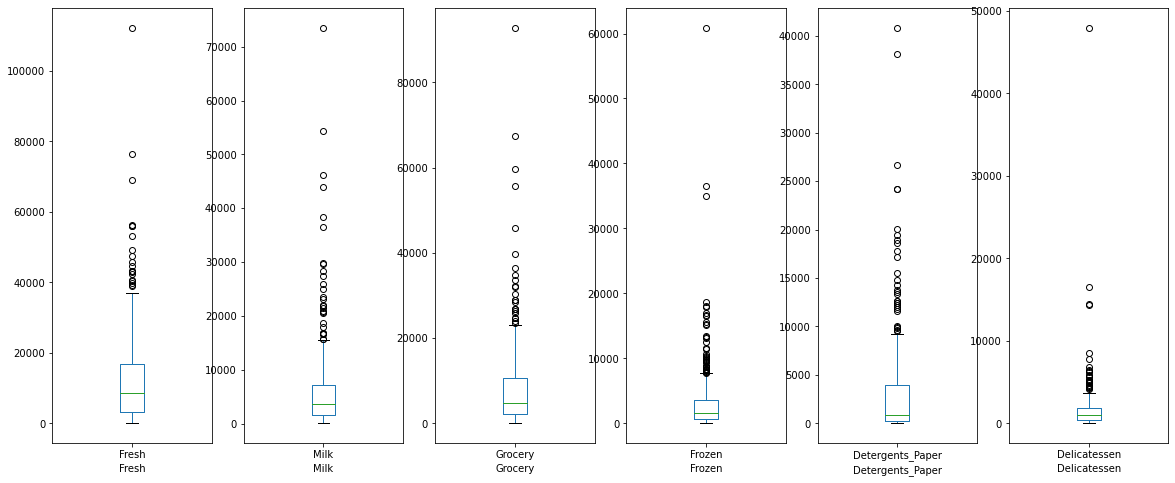

In [98]:
plt.figure(figsize=(20,8))
plt.subplot(1,6,1)
WS_Cust['Fresh'].plot(kind = 'box')
plt.xlabel('Fresh')
plt.subplot(1,6,2)
WS_Cust['Milk'].plot(kind = 'box')
plt.xlabel('Milk')
plt.subplot(1,6,3)
WS_Cust['Grocery'].plot(kind = 'box')
plt.xlabel('Grocery')
plt.subplot(1,6,4)
WS_Cust['Frozen'].plot(kind = 'box')
plt.xlabel('Frozen')
plt.subplot(1,6,5)
WS_Cust['Detergents_Paper'].plot(kind = 'box')
plt.xlabel('Detergents_Paper')
plt.subplot(1,6,6)
WS_Cust['Delicatessen'].plot(kind = 'box')
plt.xlabel('Delicatessen')

In [99]:
Sort_Fresh=np.sort(WS_Cust['Fresh'])
Count_Fresh=WS_Cust['Fresh'].count()
Q1_Fresh=np.percentile(WS_Cust['Fresh'],25, interpolation = 'midpoint')
Q2_Fresh=np.percentile(WS_Cust['Fresh'],50, interpolation = 'midpoint')
Q3_Fresh=np.percentile(WS_Cust['Fresh'],75, interpolation = 'midpoint')
IQR_Fresh=Q3_Fresh-Q1_Fresh
Low_Fresh=Q1_Fresh-1.5*IQR_Fresh
High_Fresh=Q3_Fresh+1.5*IQR_Fresh
Outlier_Fresh=[]
for x in Sort_Fresh:
    if (( x>High_Fresh) or ( x<Low_Fresh)):
        Outlier_Fresh.append(x)
        
Sort_Milk=np.sort(WS_Cust['Milk'])
Count_Milk=WS_Cust['Milk'].count()
Q1_Milk=np.percentile(WS_Cust['Milk'],25, interpolation = 'midpoint')
Q2_Milk=np.percentile(WS_Cust['Milk'],50, interpolation = 'midpoint')
Q3_Milk=np.percentile(WS_Cust['Milk'],75, interpolation = 'midpoint')
IQR_Milk=Q3_Milk-Q1_Milk
Low_Milk=Q1_Milk-1.5*IQR_Milk
High_Milk=Q3_Milk+1.5*IQR_Milk
Outlier_Milk=[]
for x in Sort_Milk:
    if (( x>High_Milk) or ( x<Low_Milk)):
        Outlier_Milk.append(x)

Sort_Grocery=np.sort(WS_Cust['Grocery'])
Count_Grocery=WS_Cust['Grocery'].count()
Q1_Grocery=np.percentile(WS_Cust['Grocery'],25, interpolation = 'midpoint')
Q2_Grocery=np.percentile(WS_Cust['Grocery'],50, interpolation = 'midpoint')
Q3_Grocery=np.percentile(WS_Cust['Grocery'],75, interpolation = 'midpoint')
IQR_Grocery=Q3_Grocery-Q1_Grocery
Low_Grocery=Q1_Grocery-1.5*IQR_Grocery
High_Grocery=Q3_Grocery+1.5*IQR_Grocery
Outlier_Grocery=[]
for x in Sort_Grocery:
    if (( x>High_Grocery) or ( x<Low_Grocery)):
        Outlier_Grocery.append(x)

Sort_Frozen=np.sort(WS_Cust['Frozen'])
Count_Frozen=WS_Cust['Frozen'].count()
Q1_Frozen=np.percentile(WS_Cust['Frozen'],25, interpolation = 'midpoint')
Q2_Frozen=np.percentile(WS_Cust['Frozen'],50, interpolation = 'midpoint')
Q3_Frozen=np.percentile(WS_Cust['Frozen'],75, interpolation = 'midpoint')
IQR_Frozen=Q3_Frozen-Q1_Frozen
Low_Frozen=Q1_Frozen-1.5*IQR_Frozen
High_Frozen=Q3_Frozen+1.5*IQR_Frozen
Outlier_Frozen=[]
for x in Sort_Frozen:
    if (( x>High_Frozen) or ( x<Low_Frozen)):
        Outlier_Frozen.append(x)

Sort_Detergents_Paper=np.sort(WS_Cust['Detergents_Paper'])
Count_Detergents_Paper=WS_Cust['Detergents_Paper'].count()
Q1_Detergents_Paper=np.percentile(WS_Cust['Detergents_Paper'],25, interpolation = 'midpoint')
Q2_Detergents_Paper=np.percentile(WS_Cust['Detergents_Paper'],50, interpolation = 'midpoint')
Q3_Detergents_Paper=np.percentile(WS_Cust['Detergents_Paper'],75, interpolation = 'midpoint')
IQR_Detergents_Paper=Q3_Detergents_Paper-Q1_Detergents_Paper
Low_Detergents_Paper=Q1_Detergents_Paper-1.5*IQR_Detergents_Paper
High_Detergents_Paper=Q3_Detergents_Paper+1.5*IQR_Detergents_Paper
Outlier_Detergents_Paper=[]
for x in Sort_Detergents_Paper:
    if (( x>High_Detergents_Paper) or ( x<Low_Detergents_Paper)):
        Outlier_Detergents_Paper.append(x)

Sort_Delicatessen=np.sort(WS_Cust['Delicatessen'])
Count_Delicatessen=WS_Cust['Delicatessen'].count()
Q1_Delicatessen=np.percentile(WS_Cust['Delicatessen'],25, interpolation = 'midpoint')
Q2_Delicatessen=np.percentile(WS_Cust['Delicatessen'],50, interpolation = 'midpoint')
Q3_Delicatessen=np.percentile(WS_Cust['Delicatessen'],75, interpolation = 'midpoint')
IQR_Delicatessen=Q3_Delicatessen-Q1_Delicatessen
Low_Delicatessen=Q1_Delicatessen-1.5*IQR_Delicatessen
High_Delicatessen=Q3_Delicatessen+1.5*IQR_Delicatessen
Outlier_Delicatessen=[]
for x in Sort_Delicatessen:
    if (( x>High_Delicatessen) or ( x<Low_Delicatessen)):
        Outlier_Delicatessen.append(x)
print('There are ',len(Outlier_Fresh), ' outliers for product "Fresh " is',round(len(Outlier_Fresh) * 100/ Count_Fresh,2),'% of total and  which are lower than ' , Low_Fresh , ' Or Higher than ', High_Fresh)
print('There are ',len(Outlier_Milk), ' outliers for product "Milk " is',round(len(Outlier_Milk) * 100/ Count_Milk,2),'% of total and which are lower than ' , Low_Milk , ' Or Higher than ', High_Milk)
print('There are ',len(Outlier_Grocery), ' outliers for product "Grocery" is',round(len(Outlier_Grocery) * 100/ Count_Grocery,2),'% of total and which are lower than ' , Low_Grocery , ' Or Higher than ', High_Grocery)
print('There are ',len(Outlier_Frozen), ' outliers for product "Frozen " is',round(len(Outlier_Frozen) * 100/ Count_Frozen,2),'% of total and  which are lower than ' , Low_Frozen , ' Or Higher than ', High_Frozen)
print('There are ',len(Outlier_Detergents_Paper), ' outliers for product "Detergents_Paper is"',round(len(Outlier_Detergents_Paper) * 100/ Count_Detergents_Paper,2),'% of total and   which are lower than ' , Low_Detergents_Paper , ' Or Higher than ', High_Detergents_Paper)
print('There are ',len(Outlier_Delicatessen), ' outliers for product "Delicatessen is"',round(len(Outlier_Delicatessen) * 100/ Count_Delicatessen,2),'% of total and    which are lower than ' , Low_Delicatessen , ' Or Higher than ', High_Delicatessen)

There are  20  outliers for product "Fresh " is 4.55 % of total and  which are lower than  -17603.0  Or Higher than  37657.0
There are  28  outliers for product "Milk " is 6.36 % of total and which are lower than  -6964.75  Or Higher than  15693.25
There are  24  outliers for product "Grocery" is 5.45 % of total and which are lower than  -10620.75  Or Higher than  23437.25
There are  42  outliers for product "Frozen " is 9.55 % of total and  which are lower than  -3488.0  Or Higher than  7788.0
There are  30  outliers for product "Detergents_Paper is" 6.82 % of total and   which are lower than  -5261.25  Or Higher than  9452.75
There are  27  outliers for product "Delicatessen is" 6.14 % of total and    which are lower than  -1713.5  Or Higher than  3942.5


In [100]:
df1=pd.DataFrame([Outlier_Fresh])
df2=pd.DataFrame([Outlier_Milk])
df3=pd.DataFrame([Outlier_Grocery])
df4=pd.DataFrame([Outlier_Frozen])
df5=pd.DataFrame([Outlier_Detergents_Paper])
df6=pd.DataFrame([Outlier_Delicatessen])
Outlier=pd.concat([df1,df2,df3,df4,df5,df6],axis=0,sort=False)
Outlier.index =['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
Outlier.T

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,38793.00,15726.00,23596.00,7849.00,9529.00,4100.00
1,39228.00,15729.00,23998.00,7888.00,9606.00,4334.00
2,39679.00,16599.00,24708.00,8132.00,9836.00,4365.00
3,40254.00,16687.00,24773.00,8164.00,9959.00,4430.00
4,40721.00,16729.00,25957.00,8170.00,10069.00,4478.00
5,42312.00,16784.00,26316.00,8195.00,11577.00,4626.00
6,42786.00,17972.00,26839.00,8321.00,11783.00,4829.00
7,43088.00,18664.00,26866.00,8366.00,12034.00,4985.00
8,43265.00,20484.00,26870.00,8425.00,12218.00,5120.00
9,44466.00,20655.00,28540.00,8620.00,12408.00,5121.00


###### ANSWER 1.4

#####  Yes there are outliers across every product , please refer above plotting supported by following Data -

###### 1) There are  20  outliers for product "Fresh " is 4.55 % of total and  which are lower than  -17603.0  Or Higher than  37657.0
###### 2) There are  28  outliers for product "Milk " is 6.36 % of total and which are lower than  -6964.75  Or Higher than  15693.25
###### 3) There are  24  outliers for product "Grocery" is 5.45 % of total and which are lower than  -10620.75  Or Higher than  23437.25
###### 4) There are  42  outliers for product "Frozen " is 9.55 % of total and  which are lower than  -3488.0  Or Higher than  7788.0
###### 5) There are  30  outliers for product "Detergents_Paper is" 6.82 % of total and   which are lower than  -5261.25  Or Higher than  9452.75
###### 6) There are  27  outliers for product "Delicatessen is" 6.14 % of total and    which are lower than  -1713.5  Or Higher than  3942.5

#### 1.5.On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

### ANSWER 1.5
•	Identified Regions and Channels with opportunity to improve sell are shown in ‘Table 1.2.5’ And  ‘Table 1.2.5’
•	Further Data is analysed for the count, central tendency,   5 number summaries, consistency (CV) and skewness outcome of this analysis is detailed in  ‘Table 1.2.3’ and ‘Table 1.2.6’ respectively for  ‘Regions’  and ‘Channels’
•	Outcome of analysis is shown in column (R/G/Y), categorised to distinguish the expected actions.
•	‘Spenders Impacted’ column in  ‘Table 1.2.3’ and ‘Table 1.2.6’ shows the spender count that we have to target  improve the sell by reviewing our offerings, client expectations , commercials, strategy.
•	Current spread for all the items across regions / channels is right skewed i.e. most spend is less than the average.  Business Focus on R (Red) categorized findings will shift the spread to right turning the sell Higher.
•	Table 1.3.1 shows the degrees on inconsistency which shows the fluctuating client behaviour or may be some gap in supply chain. This need to be reviewed to improve.
•	Outliers from table Table 1.4.1 and Table 1.4.2 to be reviewed for correctness.
•	This Analysis should be redone after removing the unexpected outliers.


### Q2.The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [101]:
CMSU = pd.read_csv('Survey.csv')

In [102]:
CMSU.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [103]:
CMSU.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.00,62,62.00,62,62,62,62.00,62,62.00,62.00,62.00,62.00,62,62.00
unique,nan,2,nan,3,8,3,nan,3,nan,nan,nan,nan,3,nan
top,nan,Female,nan,Senior,Retailing/Marketing,Yes,nan,Part-Time,nan,nan,nan,nan,Laptop,nan
freq,nan,33,nan,31,14,28,nan,43,nan,nan,nan,nan,55,nan
mean,31.50,NaN,21.13,NaN,NaN,NaN,3.13,NaN,48.55,1.52,3.74,482.02,NaN,246.21
std,18.04,NaN,1.43,NaN,NaN,NaN,0.38,NaN,12.08,0.84,1.21,221.95,NaN,214.47
min,1.00,NaN,18.00,NaN,NaN,NaN,2.30,NaN,25.00,0.00,1.00,100.00,NaN,0.00
25%,16.25,NaN,20.00,NaN,NaN,NaN,2.90,NaN,40.00,1.00,3.00,312.50,NaN,100.00
50%,31.50,NaN,21.00,NaN,NaN,NaN,3.15,NaN,50.00,1.00,4.00,500.00,NaN,200.00
75%,46.75,NaN,22.00,NaN,NaN,NaN,3.40,NaN,55.00,2.00,4.00,600.00,NaN,300.00


In [104]:
CMSU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [105]:
CMSU.shape

(62, 14)

In [106]:
CMSU.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

####  2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

##### 2.1.1.Gender and Major

In [107]:
pd.crosstab(CMSU['Gender'],CMSU['Major'], margins=True, margins_name='Total')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


##### 2.1.2.Gender and Grad Intention

In [108]:
pd.crosstab(CMSU['Gender'],CMSU['Grad Intention'], margins=True, margins_name='Total')

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


#####  2.1.3.Gender and Employment

In [109]:
pd.crosstab(CMSU['Gender'],CMSU['Employment'], margins=True, margins_name='Total')

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


##### 2.1.4.Gender and Compute

In [110]:
pd.crosstab(CMSU['Gender'],CMSU['Computer'], margins=True, margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


#### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.2.1.What is the probability that a randomly selected CMSU student will be male?

In [111]:
Male= CMSU[CMSU['Gender']=='Male']['ID'].count()
Female= CMSU[CMSU['Gender']=='Female']['ID'].count()
Total_Count=len(CMSU['Gender'])
print('Male Count is:',Male, '-- Female Count is:', Female,  '-- probability that a randomly selected CMSU student will be a MALE is: ',   round((Male/Total_Count) * 100,2),'%')

Male Count is: 29 -- Female Count is: 33 -- probability that a randomly selected CMSU student will be a MALE is:  46.77 %


###### ANSWER 2.2.1.
###### Male Count is: 29 
###### Female Count is: 33
###### Probability that a randomly selected CMSU student will be a MALE is:   Count of Male / Total Students =29/62 = 46.77 %

##### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [112]:
Male= CMSU[CMSU['Gender']=='Male']['ID'].count()
Female= CMSU[CMSU['Gender']=='Female']['ID'].count()
Total=Male+Female

print('Male Count is:',Male, '-- Female Count is:', Female,  '-- probability that a randomly selected CMSU student will be a FEMALE is: ',   round((Female/Total) * 100,2),'%')

Male Count is: 29 -- Female Count is: 33 -- probability that a randomly selected CMSU student will be a FEMALE is:  53.23 %


###### ANSWER 2.2.2.
###### Male Count is: 29 
###### Female Count is: 33
###### Probability that a randomly selected CMSU student will be a FMALE is:  Count of Female / Total Students = 33/62 = 53.23 %

#### 2.3.	 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.3.1.	 Find the conditional probability of different majors among the male students in CMSU.

In [113]:
df_male= pd.crosstab(CMSU['Gender'],CMSU['Major'], margins=False, margins_name='Total')
Male_count= CMSU[CMSU['Gender']=='Male']['ID'].count()
df_male_maj_prob= df_male.T.drop('Female', axis=1 )
df_male_maj_prob['P (Major ∩ male)/ P(male)']=df_male_maj_prob['Male']/Male_count
df_male_maj_prob

Gender,Male,P (Major ∩ male)/ P(male)
Major,,
Accounting,4,0.14
CIS,1,0.03
Economics/Finance,4,0.14
International Business,2,0.07
Management,6,0.21
Other,4,0.14
Retailing/Marketing,5,0.17
Undecided,3,0.10


### ANSWER 2.3.1.

#### conditional probability of different majors among the male students in CMSU = P (Major | male) = P (Major ∩ male)/ P(male)

                              Male 	P (Major ∩ male)/ P(male)

                    Accounting 	4 	0.14
                           CIS 	1     0.03
             Economics/Finance 	4 	0.14
        International Business 	2 	0.07
                    Management 	6 	0.21
                         Other 	4 	0.14
           Retailing/Marketing 	5 	0.17
                     Undecided 	3 	0.10

##### 2.3.2.	Find the conditional probability of different majors among the female students of CMSU.

P (Major | female) = P (Major ∩ female)/ P(female)

In [114]:
df_female= pd.crosstab(CMSU['Gender'],CMSU['Major'], margins=False, margins_name='Total')
Female_count= CMSU[CMSU['Gender']=='Female']['ID'].count()
df_female_maj_prob= df_female.T.drop('Male', axis=1 )
df_female_maj_prob[' P (Major ∩ female)/ P(female))']= round(df_female_maj_prob['Female']/Female_count,4)
df_female_maj_prob

Gender,Female,P (Major ∩ female)/ P(female))
Major,,
Accounting,3,0.09
CIS,3,0.09
Economics/Finance,7,0.21
International Business,4,0.12
Management,4,0.12
Other,3,0.09
Retailing/Marketing,9,0.27
Undecided,0,0.00


### ANSWER 2.3.2.
#### conditional probability of different majors among the female students of CMSU = P (Major ∩ female)/ P(female))


                        Female 	P (Major ∩ female)/ P(female))
                Accounting 	3 	0.09
                       CIS 	3 	0.09
           onomics/Finance 	7 	0.21
    International Business 	4 	0.12
                Management 	4 	0.12
                     Other 	3 	0.09
       Retailing/Marketing 	9 	0.27
                 Undecided 	0 	0.00

#### 2.4.	 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

##### 2.4.1.	 Find the probability That a randomly chosen student is a male and intends to graduate.

In [115]:
Male_count= CMSU[CMSU['Gender']=='Male']['ID'].count()
P_male=Male_count /len(CMSU['Gender'])
Male_Grad_Intention_Yes= CMSU[(CMSU['Gender']=='Male') & (CMSU['Grad Intention']=='Yes')]['ID'].count()
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male)= ",round((Male_Grad_Intention_Yes/Male_count) * P_male,2))

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male)=  0.27


### ANSWER 2.4.1.

#####  probability That a randomly chosen student is a male and intends to graduate is -
##### P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) = 17/29 * 29/62 = 0.27



##### 2.4.2.	 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [116]:
Female_count= CMSU[CMSU['Gender']=='Female']['ID'].count()
P_Female=Female_count /len(CMSU['Gender'])
Female_Laptop_Yes= CMSU[(CMSU['Gender']=='Female') & (CMSU['Computer']=='Laptop')]['ID'].count()
print("P(other than Laptop ∩ Female) = (1 - P (Laptop| Female)) x P (Female)   ",round((1- Female_Laptop_Yes/Female_count) * P_Female,4))

P(other than Laptop ∩ Female) = (1 - P (Laptop| Female)) x P (Female)    0.0645


### ANSWER 2.4.2.

#####  probability that a randomly selected student is a female and does NOT have a laptop -
##### P(other than Laptop ∩ Female) = (1 - P (Laptop| Female)) x P (Female) =  (1- 29/33 )* 33/62 = 0.0645

#### 2.5.	 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.5.1.	 Find the probability that a randomly chosen student is a male or has full-time employment?

In [117]:
Male_count= CMSU[CMSU['Gender']=='Male']['ID'].count()
P_Male=Male_count /len(CMSU['Gender'])
P_Full_time= (CMSU[(CMSU['Employment']=='Full-Time')]['ID'].count())/len(CMSU['Gender'])
Male_Full_time = (CMSU[(CMSU['Gender']=='Male') & (CMSU['Employment']=='Full-Time')]['ID'].count())/len(CMSU['Gender'])
print("P(Male U full-time)= P(Male) + P(Full-Time) -P(Male ∩ Full-Time) == ", round(P_Male+P_Full_time-Male_Full_time,3))


P(Male U full-time)= P(Male) + P(Full-Time) -P(Male ∩ Full-Time) ==  0.516


### ANSWER 2.5.1.

#####  probability that a randomly chosen student is a male or has full-time employment-
##### P(Male U full-time)= P(Male) + P(Full-Time) -P(Male ∩ Full-Time) =  (29/62 + 10/62 - 7/62 ) = 0.516

##### 2.5.2.	 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [118]:
Female_count= CMSU[CMSU['Gender']=='Female']['ID'].count()
Female_International_Business = (CMSU[(CMSU['Gender']=='Female') & (CMSU['Major']=='International Business')]['ID'].count())/Female_count
Female_Management = (CMSU[(CMSU['Gender']=='Female') & (CMSU['Major']=='Management')]['ID'].count())/Female_count
print("P(International Business U Management) / Female = P(International Business/Female) + P(Management/Female) == ", round(Female_International_Business+Female_Management,3))

P(International Business U Management) / Female = P(International Business/Female) + P(Management/Female) ==  0.242


### ANSWER 2.5.2.

#####  probability that given a female student is randomly chosen, she is majoring in international business or management.-
##### P(International Business U Management) / Female = P(International Business/Female) + P(Management/Female) =  4/33 + 4/33= 0.242

#### 2.6.	Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [119]:
pd.crosstab(CMSU['Gender'],CMSU['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [120]:
Female_count= CMSU[CMSU['Gender']=='Female']['ID'].count()
P_Female=Female_count /len(CMSU['Gender'])
Female_Grad_Intention_Yes= CMSU[(CMSU['Gender']=='Female') & (CMSU['Grad Intention']=='Yes')]['ID'].count()
print("P(Grad Intention ∩ Female) = P (Grad Intention| Female) x P (Female)= ",round((Female_Grad_Intention_Yes/Female_count)* P_Female,2))

P(Grad Intention ∩ Female) = P (Grad Intention| Female) x P (Female)=  0.18


In [121]:
pd.crosstab(CMSU['Gender'] ,CMSU['Grad Intention']).drop(['Undecided'],axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [122]:
df1= (pd.crosstab(CMSU['Gender'] ,CMSU['Grad Intention']).drop(['Undecided'],axis=1))
Total_count=df1['Yes'].sum()+ df1['No'].sum()
df1= (pd.crosstab(CMSU['Gender'] ,CMSU['Grad Intention']).drop(['Undecided'],axis=1)).drop('Male', axis=0)
Female_count=df1['Yes']+df1['No']
P_Female=Female_count /Total_count
Female_Grad_Intention_Yes= df1['Yes']
print("P(Grad Intention ∩ Female) = P (Grad Intention| Female) x P (Female)= ",round((Female_Grad_Intention_Yes/Female_count)* P_Female,2))

P(Grad Intention ∩ Female) = P (Grad Intention| Female) x P (Female)=  Gender
Female   0.28
dtype: float64


### ANSWER 2.6.


##### The graduate intention and being female are not independent events which is evident from the following outcome from the given data

#####  Probability  that a Female is selected and she intends to Gratuate  while 'undecided' category considered was 0.18
#####  Probability  that a Female is selected and she intends to Gratuate  Without  'undecided' onsidered increased to 0.28

#### 2.7.	Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

##### 2.7.1.	If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


In [124]:
# Count of GPA
n=len(CMSU['GPA']) 
# inclusive is set as False as we want less than 3 GPA
is_between1 = CMSU['GPA'].between(0, 3, inclusive=False ) 
# Count of GPA less than 3 occurances
m=len(CMSU[is_between1])
print('If a student is chosen randomly,  the probability that his/her GPA is less than 3 is ',round((m/n)* 100,3))

If a student is chosen randomly,  the probability that his/her GPA is less than 3 is  27.419


### ANSWER 2.7.1


##### If a student is chosen randomly, then the probability that his/her GPA is less than 3 is 27.419

##### 2.7.2.	 Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [125]:
CMSU_Male = CMSU[CMSU['Gender'] == 'Male']
CMSU_Female = CMSU[CMSU['Gender'] == 'Female']
n=len(CMSU_Male['Salary'])
is_between1 = CMSU_Male['Salary'].between(50, CMSU_Male['Salary'].max(), inclusive=True )
m=len(CMSU_Male[is_between1])
print('conditional probability that a randomly selected male earns 50 or more is (count of Male with salary >= 50 /total Male Count)',
      round((m/n),3))
n=len(CMSU_Female['Salary'])
is_between1 = CMSU_Female['Salary'].between(50, CMSU_Female['Salary'].max(), inclusive=True )
m=len(CMSU_Female[is_between1])

print('conditional probability that a randomly selected Female earns 50 or more is (count of Female with salary >= 50 /total Female Count)',
      round((m/n),3))

conditional probability that a randomly selected male earns 50 or more is (count of Male with salary >= 50 /total Male Count) 0.483
conditional probability that a randomly selected Female earns 50 or more is (count of Female with salary >= 50 /total Female Count) 0.545


### ANSWER 2.7.2

#####  Conditional probability that a randomly selected Male earns 50 or more. 

###### count of Male with salary >= 50  =  14
###### count of Male                    =  29
###### conditional probability that a randomly selected male earns 50 or more is == 0.483

#####  Conditional probability that a randomly selected Female earns 50 or more. 

###### count of Male with salary >= 50  =  18
###### count of Male                    =  33
###### conditional probability that a randomly selected male earns 50 or more is == 0.545

#### 2.8.	 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

##  CMSU['GPA'] HISTOGRAM

<AxesSubplot:xlabel='GPA', ylabel='Density'>

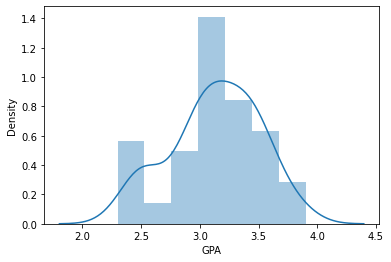

In [126]:
sns.distplot(CMSU['GPA'])

### Histogram Review for CMSU['GPA'] Shows -
#### 1) 2 Peaks
#### 2) Left Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##  CMSU['GPA'] 5 Number Summary

In [127]:
CMSU['GPA'].describe(include='all')

count   62.00
mean     3.13
std      0.38
min      2.30
25%      2.90
50%      3.15
75%      3.40
max      3.90
Name: GPA, dtype: float64

### CMSU['GPA'] review of 5 number Summary Suggests that -
  ##### Disribution is  Left skewed  -
        (Q1 - Min) which is 0.60  > Max - Q3 which is 0.50 
  ##### Following points  upport the symmetry -
        (Q2 - Min ) which is 0.75 =  (Max - Q2) which is 0.75
        (Q2 - Q1 ) which is 0.25 = (Q3 - Q2 ) which is 0.25
        
   ##### Let's review the Box plot as second level of verification to Confirm the Skewness -     

##  CMSU['GPA'] BOXPLOT

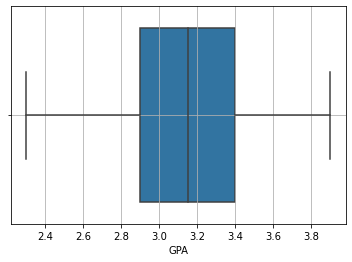

In [128]:
sns.boxplot(x=CMSU['GPA'])
plt.grid()

### CMSU['GPA'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is LeftSkewed due to longer Left Whisker


## CMSU['GPA']  Empirical Rule

In [129]:
x_1std= CMSU['GPA'].mean() + (1 * CMSU['GPA'].std())
y_1std= CMSU['GPA'].mean() - (1 * CMSU['GPA'].std())
x_2std= CMSU['GPA'].mean() + (2 * CMSU['GPA'].std())
y_2std= CMSU['GPA'].mean() - (2 * CMSU['GPA'].std())
x_3std= CMSU['GPA'].mean() + (3 * CMSU['GPA'].std())
y_3std= CMSU['GPA'].mean() - (3 * CMSU['GPA'].std())

Sample_size=len(CMSU['GPA'])

is_between11 = CMSU['GPA'].between(CMSU['GPA'].mean(),x_1std, inclusive=False )
Level11=len(CMSU[is_between11])
is_between12 = CMSU['GPA'].between(y_1std,CMSU['GPA'].mean(), inclusive=False )
Level12=len(CMSU[is_between12]) 

is_between21 = CMSU['GPA'].between(CMSU['GPA'].mean(),x_2std, inclusive=False )
Level21=len(CMSU[is_between21])
is_between22 = CMSU['GPA'].between(y_2std,CMSU['GPA'].mean(), inclusive=False )
Level22=len(CMSU[is_between22])

is_between31 = CMSU['GPA'].between(CMSU['GPA'].mean(),x_3std, inclusive=False )
Level31=len(CMSU[is_between31])
is_between32 = CMSU['GPA'].between(y_3std,CMSU['GPA'].mean(), inclusive=False )
Level32=len(CMSU[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  21.08 where as they are  24
Number of Mean - 1 Sigma occurances should be  21.08 where as they are  21
Number of Mean + 2 Sigma occurances should be  29.45 where as they are  30
Number of Mean - 2 Sigma occurances should be  29.45 where as they are  30
Number of Mean + 3 Sigma occurances should be  30.907 where as they are  31
Number of Mean - 3 Sigma occurances should be  30.907 where as they are  31


### CMSU['GPA'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Left Skewed)
#### 1) '2 standard deviation' from Mean is approximate symmetrical
#### 1) '3 standard deviation' from Mean is approximate symmetrical

##  CMSU['GPA'] mean,median and mode

In [130]:
a=CMSU['GPA'].mean()
b=CMSU['GPA'].median()
c=CMSU['GPA'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 3.129032258064516 Median = 3.1500000000000004 Mode = 3.1666666666666665


### CMSU['GPA'] review of Mean, Median and Mode suggests that -

#### In this case Mode > Median > Mean hence the distribution is Left Skewed

##  CMSU['Salary'] HISTOGRAM

<AxesSubplot:xlabel='Salary', ylabel='Density'>

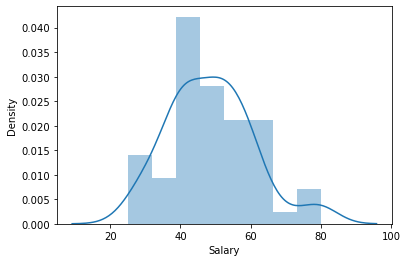

In [131]:
sns.distplot(CMSU['Salary'])

### Histogram Review for CMSU['Salary'] Shows -
#### 1) 2 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##  CMSU['Salary'] 5 Number Summary

In [132]:
CMSU['Salary'].describe(include='all')

count   62.00
mean    48.55
std     12.08
min     25.00
25%     40.00
50%     50.00
75%     55.00
max     80.00
Name: Salary, dtype: float64

### CMSU['Salary'] review of 5 number Summary Suggests that -
  ##### Disribution is  right skewed  -
         (Q1 - Min) which is 0.15 < (Max - Q3) which is 0.25
         (Q2 - Min) which is 0.25  <(Max - Q2) which is 0.30      
  ##### Disribution is  Left  skewed  -
         (Q2 - Q1) which is 0.10 > (Q3 - Q2) which is 0.05
  
  #####  Let's review the Box plot to Verify the skewness -

## CMSU['Salary'] BOXPLOT

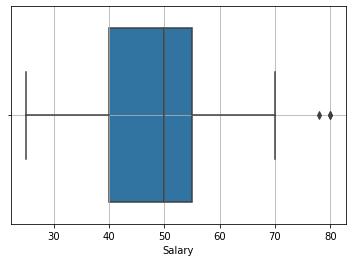

In [133]:
sns.boxplot(CMSU['Salary'] )
plt.grid()

### CMSU['Salary'] review of Boxplot Suggests that -

    #### 1) There are Multiple outliers
    #### 2) Distribution appears to be Asymmetric
    #### 3) Distribution is definitely Right skewed.

## CMSU['Salary'] Empirical Rule

In [134]:
x_1std= CMSU['Salary'].mean() + (1 * CMSU['Salary'].std())
y_1std= CMSU['Salary'].mean() - (1 * CMSU['Salary'].std())
x_2std= CMSU['Salary'].mean() + (2 * CMSU['Salary'].std())
y_2std= CMSU['Salary'].mean() - (2 * CMSU['Salary'].std())
x_3std= CMSU['Salary'].mean() + (3 * CMSU['Salary'].std())
y_3std= CMSU['Salary'].mean() - (3 * CMSU['Salary'].std())

Sample_size=len(CMSU['Salary'])

is_between11 = CMSU['Salary'].between(CMSU['Salary'].mean(),x_1std, inclusive=False )
Level11=len(CMSU[is_between11])
is_between12 = CMSU['Salary'].between(y_1std,CMSU['Salary'].mean(), inclusive=False )
Level12=len(CMSU[is_between12]) 

is_between21 = CMSU['Salary'].between(CMSU['Salary'].mean(),x_2std, inclusive=False )
Level21=len(CMSU[is_between21])
is_between22 = CMSU['Salary'].between(y_2std,CMSU['Salary'].mean(), inclusive=False )
Level22=len(CMSU[is_between22])

is_between31 = CMSU['Salary'].between(CMSU['Salary'].mean(),x_3std, inclusive=False )
Level31=len(CMSU[is_between31])
is_between32 = CMSU['Salary'].between(y_3std,CMSU['Salary'].mean(), inclusive=False )
Level32=len(CMSU[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  21.08 where as they are  27
Number of Mean - 1 Sigma occurances should be  21.08 where as they are  22
Number of Mean + 2 Sigma occurances should be  29.45 where as they are  29
Number of Mean - 2 Sigma occurances should be  29.45 where as they are  30
Number of Mean + 3 Sigma occurances should be  30.907 where as they are  32
Number of Mean - 3 Sigma occurances should be  30.907 where as they are  30


### CMSU['Salary'] review of Impirical Rule suggest that  that -

#### 1) '1 standard deviation' from Mean is Highly Left Skewed assymetrical  which is compensated covered by 3SD
#### 1) '2 standard deviation' from Mean is approximate symmetrical
#### 1) '3 standard deviation' from Mean is approximate symmetrical

##  CMSU['Salary'] mean,median and mode

In [135]:
a=CMSU['Salary'].mean()
b=CMSU['Salary'].median()
c=CMSU['Salary'].mode()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 48.54838709677419 Median = 50.0 Mode = 0   40.00
dtype: float64


### CMSU['Salary'] review of Mean, Median and Mode suggests that -

#### In this case Mode < Median hence the distribution is Left Skewed

## CMSU['Spending'] Histogram

<AxesSubplot:xlabel='Spending', ylabel='Density'>

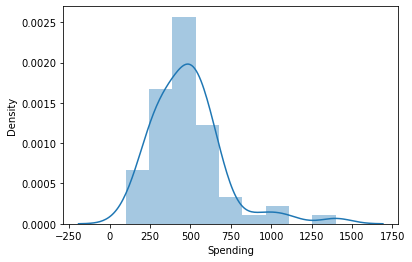

In [136]:
sns.distplot(CMSU['Spending'])

### Histogram Review for CMSU['Spending'] Shows -
#### 1) 3 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a 'Bell Curve'

##  CMSU['Spending']  5 Number Summary

In [137]:
CMSU['Spending'].describe(include='all')

count     62.00
mean     482.02
std      221.95
min      100.00
25%      312.50
50%      500.00
75%      600.00
max     1400.00
Name: Spending, dtype: float64

### CMSU['Spending'] review of 5 number Summary Suggests that -

  ##### Disribution is  right skewed  -
         (Q1 - Min) which is 212.50 < (Max - Q3) which is 800
         (Q2 - Min) which is 400  <(Max - Q2) which is 900      
  ##### Disribution is  Left  skewed  -
         (Q2 - Q1) which is 187.50 > (Q3 - Q2) which is 100
  
  #####  Let's review the Box plot to Verify the skewness -

## CMSU['Spending'] BoxPlot

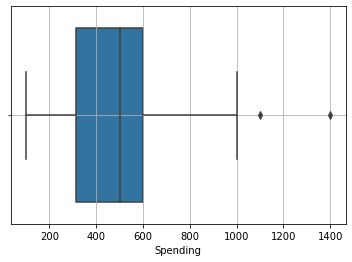

In [138]:
sns.boxplot(CMSU['Spending'] )
plt.grid()

### CMSU['Spending'] review of Boxplot Suggests that -

#### 1) There are Multiple outliers
#### 2) Distribution appears to be Asymmetric
#### 3) Distribution is Right skewed due to outliers and whiskers.

## CMSU['Spending']  Empirical Rule

In [139]:
x_1std= CMSU['Spending'].mean() + (1 * CMSU['Spending'].std())
y_1std= CMSU['Spending'].mean() - (1 * CMSU['Spending'].std())
x_2std= CMSU['Spending'].mean() + (2 * CMSU['Spending'].std())
y_2std= CMSU['Spending'].mean() - (2 * CMSU['Spending'].std())
x_3std= CMSU['Spending'].mean() + (3 * CMSU['Spending'].std())
y_3std= CMSU['Spending'].mean() - (3 * CMSU['Spending'].std())

Sample_size=len(CMSU['Spending'])

is_between11 = CMSU['Spending'].between(CMSU['Spending'].mean(),x_1std, inclusive=False )
Level11=len(CMSU[is_between11])
is_between12 = CMSU['Spending'].between(y_1std,CMSU['Spending'].mean(), inclusive=False )
Level12=len(CMSU[is_between12]) 

is_between21 = CMSU['Spending'].between(CMSU['Spending'].mean(),x_2std, inclusive=False )
Level21=len(CMSU[is_between21])
is_between22 = CMSU['Spending'].between(y_2std,CMSU['Spending'].mean(), inclusive=False )
Level22=len(CMSU[is_between22])

is_between31 = CMSU['Spending'].between(CMSU['Spending'].mean(),x_3std, inclusive=False )
Level31=len(CMSU[is_between31])
is_between32 = CMSU['Spending'].between(y_3std,CMSU['Spending'].mean(), inclusive=False )
Level32=len(CMSU[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  21.08 where as they are  30
Number of Mean - 1 Sigma occurances should be  21.08 where as they are  20
Number of Mean + 2 Sigma occurances should be  29.45 where as they are  31
Number of Mean - 2 Sigma occurances should be  29.45 where as they are  28
Number of Mean + 3 Sigma occurances should be  30.907 where as they are  33
Number of Mean - 3 Sigma occurances should be  30.907 where as they are  28


### CMSU['Spending'] review of Impirical Rule suggest that  that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  CMSU['Spending'] mean,median and mode

In [140]:
a=CMSU['Spending'].mean()
b=CMSU['Spending'].median()
c=CMSU['Spending'].mode()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 482.01612903225805 Median = 500.0 Mode = 0    500
dtype: int64


### CMSU['Spending'] review of Mean, Median and Mode suggests that -

### Skeweness can not be conclued however this is not a normal distribution

## CMSU['Text Messages'] Histogram

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

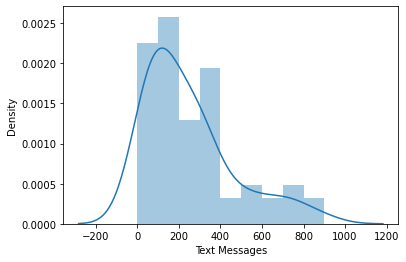

In [141]:
sns.distplot(CMSU['Text Messages'])

## Histogram Review for CMSU['Text Messages'] Shows -
#### 1) 2 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a 'Bell Curve'

## CMSU['Text Messages']  5 Number Summary

In [142]:
CMSU['Text Messages'].describe(include='all')

count    62.00
mean    246.21
std     214.47
min       0.00
25%     100.00
50%     200.00
75%     300.00
max     900.00
Name: Text Messages, dtype: float64

### CMSU['Test Messages'] review of 5 number Summary Suggests that -

  ##### Distribution  is  right skewed  -
         (Q1 - Min) which is 100 < (Max - Q3) which is 600
         (Q2 - Min) which is 200  <(Max - Q2) which is 700      
  ##### Distribution  is Symmetrical  -
         (Q2 - Q1) which is 100 =  (Q3 - Q2) which is 100
  
  #####  Let's review the Box plot to Verify the skewness -

## CMSU['Text Messages'] BoxPlot

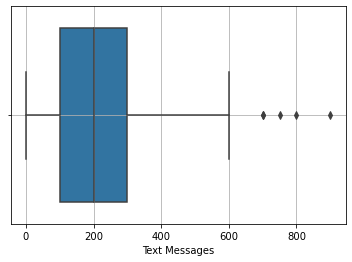

In [143]:
sns.boxplot(x=CMSU['Text Messages'])
plt.grid()

### CMSU['Text Messages'] review of Boxplot Suggests that -

#### 1) There are Multiple outliers
#### 2) Distribution appears to be Asymmetric
#### 3) Distribution is Right skewed due to outliers and whiskers.

## CMSU['Text Messages'] Empirical Rule

In [144]:
x_1std= CMSU['Text Messages'].mean() + (1 * CMSU['Text Messages'].std())
y_1std= CMSU['Text Messages'].mean() - (1 * CMSU['Text Messages'].std())
x_2std= CMSU['Text Messages'].mean() + (2 * CMSU['Text Messages'].std())
y_2std= CMSU['Text Messages'].mean() - (2 * CMSU['Text Messages'].std())
x_3std= CMSU['Text Messages'].mean() + (3 * CMSU['Text Messages'].std())
y_3std= CMSU['Text Messages'].mean() - (3 * CMSU['Text Messages'].std())

Sample_size=len(CMSU['Text Messages'])

is_between11 = CMSU['Text Messages'].between(CMSU['Text Messages'].mean(),x_1std, inclusive=False )
Level11=len(CMSU[is_between11])
is_between12 = CMSU['Text Messages'].between(y_1std,CMSU['Text Messages'].mean(), inclusive=False )
Level12=len(CMSU[is_between12]) 

is_between21 = CMSU['Text Messages'].between(CMSU['Text Messages'].mean(),x_2std, inclusive=False )
Level21=len(CMSU[is_between21])
is_between22 = CMSU['Text Messages'].between(y_2std,CMSU['Text Messages'].mean(), inclusive=False )
Level22=len(CMSU[is_between22])

is_between31 = CMSU['Text Messages'].between(CMSU['Text Messages'].mean(),x_3std, inclusive=False )
Level31=len(CMSU[is_between31])
is_between32 = CMSU['Text Messages'].between(y_3std,CMSU['Text Messages'].mean(), inclusive=False )
Level32=len(CMSU[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  21.08 where as they are  16
Number of Mean - 1 Sigma occurances should be  21.08 where as they are  33
Number of Mean + 2 Sigma occurances should be  29.45 where as they are  21
Number of Mean - 2 Sigma occurances should be  29.45 where as they are  36
Number of Mean + 3 Sigma occurances should be  30.907 where as they are  25
Number of Mean - 3 Sigma occurances should be  30.907 where as they are  36


### CMSU['Text Messages'] review of Impirical Rule suggest that  that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  CMSU['Text Messages'] mean,median and mode

In [145]:
a=CMSU['Text Messages'].mean()
b=CMSU['Text Messages'].median()
c=CMSU['Text Messages'].mode()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 246.20967741935485 Median = 200.0 Mode = 0    300
dtype: int64


### CMSU['Text Messages'] review of Mean, Median and Mode suggests that -

#### Skeweness can not be conclued however this is not a normal distribution

### ANSWER 2.8

### Q3 An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

#### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


In [146]:
asphalt_shingles=pd.read_csv('A & B shingles-1.csv')

In [147]:
asphalt_shingles

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


#### 3.1.	Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


# Test Objective
For every moisture test,the claim to check here becomes whether the moisture content is still greater than 0.35 pounds per 100 square feet

# Step 1: Define null and alternative hypotheses

For the A shingles,the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

H0 : mean moisture content <=0.35

HA : mean moisture content > 0.35



For the B shingles,the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

H0 : mean moisture content <=0.35

HA : mean moisture content > 0.35

# Step 2: Decide the significance level

##### Here we select 𝛼 = 0.05 as this is not specified in the problem statement

# Step 3: Identify Test Statistics

In [148]:
print("The sample size for asphalt_shingles['A'] is", asphalt_shingles['A'].count())
print("The sample size for asphalt_shingles['B'] is", asphalt_shingles['B'].count())

The sample size for asphalt_shingles['A'] is 36
The sample size for asphalt_shingles['B'] is 31


##### We do not know the population standard deviation and for A, samplesize is 36. So we use the t distribution and the $t_{STAT}$ test statistic.
##### We do not know the population standard deviation and for B, samplesize is 31. So we use the t distribution and the $t_{STAT}$ test statistic.

# Step 4: Calculate P-value and Test Statistics

In [149]:
# one sample t-test for A shingles
# null hypothesis: expected value = 0.35
t_statistic, p_value = ttest_1samp(asphalt_shingles['A'], 0.35)
p_value_one_Tail=round(p_value/2,4)
print('for A shingles , One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value_one_Tail))


# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value_one_Tail < alpha_value: 
    print('We have evidence to reject the null hypothesis for A shingles ; since p value for A shingles < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis for A shingles ; since p value for A shingles  > Level of significance') 

print ("Our one-sample t-test for A shingles ;p-value=", p_value_one_Tail)

for A shingles , One sample t test 
t statistic: -1.4735046253382782 p value: 0.0748 
Level of significance: 0.05
We have no evidence to reject the null hypothesis for A shingles ; since p value for A shingles  > Level of significance
Our one-sample t-test for A shingles ;p-value= 0.0748


In [150]:
# one sample t-test for B shingles
# null hypothesis: expected value = 0.35
t_statistic, p_value =ttest_1samp(asphalt_shingles['B'].dropna(), 0.35)
p_value_one_Tail=round(p_value/2,4)
print('for B shingles , One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value_one_Tail))


# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value_one_Tail < alpha_value: 
    print('We have evidence to reject the null hypothesis for B shingles ; since p value for B shingles < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis for B shingles ; since p value for B shingles  > Level of significance') 

print ("Our one-sample t-test for B shingles ;p-value=", p_value_one_Tail)

for B shingles , One sample t test 
t statistic: -3.1003313069986995 p value: 0.0021 
Level of significance: 0.05
We have evidence to reject the null hypothesis for B shingles ; since p value for B shingles < Level of significance
Our one-sample t-test for B shingles ;p-value= 0.0021


# Step 5: Decide to reject or accept null hypothesis

1. The null hypothesis is the ​current status or statusquo. The company's current status is that the mean moisture content is less than 0.35.

Their current statusquo needs to be refuted on the basis of very strong evidence. The company does this test on the basis of the assumption that their production process is undercontrol.

That is hinted as To monitor the amount of moisture present, the company conducts moisture tests

2.Hence

        H0:mean moisture content=<0.35(since it is current claim)
        Ha:mean moisture content > 0.35. 

    The company is monitoring its quality control

3.This is a peculiar case of claim and statusquo being the same i.e. Ho<=0.35 while the test is carried out is to test for the opposite i.e. Ha > 0.35

4.The stated null and alternative hypothesis is irrespective of the sample values. This is important to understand. The highest tolerant value of moisture content is 0.35. The process is much better than the acceptable value, hence the average content found from the sample is considerably less than the acceptable limit.

5.The rejection region in this case is still on the right side. Since the sample average is less than the null value,the p-value of the test will be greater than 0.05. The null hypothesis will not be rejected


### ANSWER 3.1

There is no evidence that means moisture contents in both types of shingles are within the permissible limits

average moisture content For 'A' Shingles is less than 0.35 pounds per 100 square feet
average moisture content for 'B' Shingles is more than 0.35 pounds per 100 square feet

#### FOR 'A' shingles

We have no evidence to reject the null hypothesis for A shingles ; since p value for A shingles  > Level of significance
Our one-sample t-test for A shingles ;p-value= 0.0748

Basis the hypothesis test performed for  the given Sample of 36 observations at 95% confidence level we fail to reject H0 i.e. average moisture content For 'A' Shingles is less than 0.35 pounds per 100 square feet

#### FOR 'B' shingles

We have evidence to reject the null hypothesis for B shingles ; since p value for B shingles  < Level of significance
Our one-sample t-test for B shingles ;p-value=  0.0021

Basis the hypothesis test performed for  the given Sample of 31 observations at 95% confidence level we reject H0 i.e. average moisture content for 'B' Shingles is more than 0.35 pounds per 100 square feet


#### 3.2.	 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


### Verifying the assumptions

In [151]:
round(round(statistics.variance(asphalt_shingles['B'].dropna()),4) - round(statistics.variance(asphalt_shingles['A']),4),4)

0.0005

#### Variance of 'A' is almost equal to Variance of 'B'

####  Distribution of Both the samples 'A' and 'B' is Right Skewed

### Step 1: Define null and alternative hypotheses

In testing whether the average moisture content of the shingles  is  same in both the categories ('A' and 'B') of the shingles, the null hypothesis states that the average moisture content of the shingles are the same, $\mu{A}$ equals $\mu{B}$. The alternative hypothesis states that the average moisture content of the shingles are different, $\mu{A}$ is not equal to $\mu{B}$.

* $H_0$: $\mu{A}$ - $\mu{B}$ =      0 i.e        $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ - $\mu{B}$ $\neq$  0 i.e      $\mu{A}$ $\neq$ $\mu{B}$

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not the same.
* We use the t distribution and the $t_{STAT}$ test statistic for 2sampleT-Test(ttest_ind) test.

### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

For this exercise, we are going to first assume that the variance is equal and then compute the necessary statistical values.

In [152]:
t_statistic, p_value  = ttest_ind(asphalt_shingles['A'],asphalt_shingles['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',round(p_value,4)) 

tstat 1.2896282719661123
P Value 0.2017


### Step 5:  Decide to reject or accept null hypothesis

In [153]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the average moisture content of the shingles in both the categories A and B ,  ARE NOT same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the average moisture content of the shingles in both the categories A and B , ARE same.')


two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the average moisture content of the shingles in both the categories A and B , ARE same.


### ANSWER 3.2

Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the average moisture content of the shingles in both the categories A and B , ARE same.
